# Importing Package and inspection

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV,KFold
from sklearn.linear_model import LinearRegression, Ridge , Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [4]:
#importing data
insurance = pd.read_csv('D:/Tyler_Data/Other Skills/Datascience/MMDT_GitHub/MMDT_2025_MLAI101/Htet-Aung-Phyo/Mid_Term_Project/insurance.csv')

In [5]:
#data inspection
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


# Data Cleaning

In [6]:
# inspecting missing value
insurance.isna().sum().sort_values()

charges     54
age         66
sex         66
bmi         66
children    66
smoker      66
region      66
dtype: int64

In [7]:
# droping na value less than 5%
insurance = insurance.dropna(subset=insurance.columns[insurance.isna().sum()<len(insurance)])
insurance.isna().sum().sort_values()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [9]:
#removing $ 
insurance['charges']=insurance['charges'].str.replace('$','')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,4449.462
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.8552


In [10]:
#data validation
insurance[['age','children']]=insurance[['age','children']].astype('int16')
insurance[['bmi','charges']]=insurance[['bmi','charges']].astype('float32')

In [11]:
#rechecking missing value
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     1
dtype: int64

In [12]:
#filling missing value with mean of charges
insurance['charges']= insurance['charges'].fillna(insurance['charges'].mean())
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   int16  
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float32
 3   children  1208 non-null   int16  
 4   smoker    1208 non-null   object 
 5   region    1208 non-null   object 
 6   charges   1208 non-null   float32
dtypes: float32(2), int16(2), object(3)
memory usage: 51.9+ KB


In [14]:
insurance['region'].unique()

array(['southwest', 'Southeast', 'southeast', 'northwest', 'Northwest',
       'Northeast', 'northeast', 'Southwest'], dtype=object)

In [15]:
new_region = {'southeast':'Southeast','southwest':'Southwest','northeast':'Northeast','northwest':'Northwest'}
insurance['region']= insurance['region'].astype('category')
insurance['region']= insurance['region'].replace(new_region).astype('category')
insurance['region'].unique()


C:\Users\Htet\AppData\Local\Temp\ipykernel_21804\1503343253.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  insurance['region']= insurance['region'].replace(new_region).astype('category')


['Southwest', 'Southeast', 'Northwest', 'Northeast']
Categories (4, object): ['Northeast', 'Northwest', 'Southeast', 'Southwest']

In [16]:
insurance['sex'].unique()

array(['female', 'male', 'woman', 'F', 'man', 'M'], dtype=object)

In [17]:
new_sex = {'female':'F','male':'M','woman':'F','man':'M','F':'F','M':'M'}
insurance['sex']=insurance['sex'].astype('category')
insurance['sex']=insurance['sex'].replace(new_sex).astype('category')
insurance['sex'].unique()

C:\Users\Htet\AppData\Local\Temp\ipykernel_21804\2746201549.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  insurance['sex']=insurance['sex'].replace(new_sex).astype('category')


['F', 'M']
Categories (2, object): ['F', 'M']

In [18]:
insurance['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [19]:
insurance['smoker']=insurance['smoker'].astype('category')

In [20]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1208 non-null   int16   
 1   sex       1208 non-null   category
 2   bmi       1208 non-null   float32 
 3   children  1208 non-null   int16   
 4   smoker    1208 non-null   category
 5   region    1208 non-null   category
 6   charges   1208 non-null   float32 
dtypes: category(3), float32(2), int16(2)
memory usage: 27.6 KB


In [21]:
insurance.describe()

,age,bmi,children,charges
count,1208.000000,1208.000000,1208.000000,1208.000000
mean,35.355960,30.574968,0.942881,13311.273438
std,22.061241,6.117562,1.311809,12131.032227
min,-64.000000,15.960000,-4.000000,1121.873901
25%,24.750000,26.195001,0.000000,4750.065552
50%,38.000000,30.230000,1.000000,9447.316406
75%,51.000000,34.580002,2.000000,16579.958984
max,64.000000,53.130001,5.000000,63770.429688


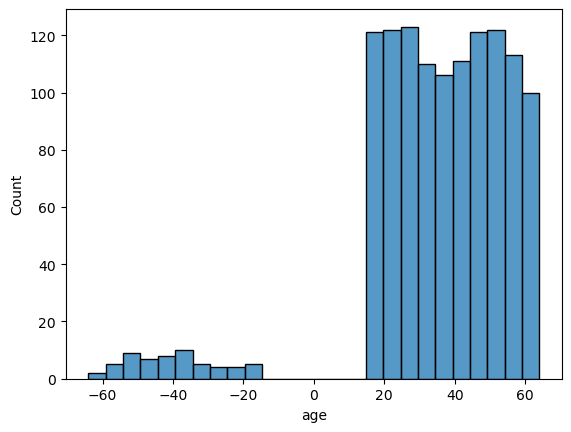

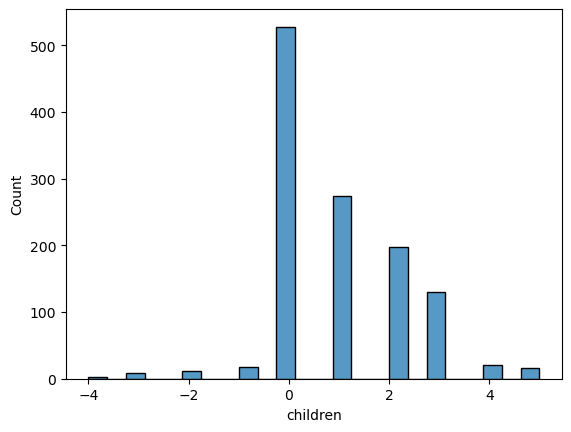

In [22]:
sns.histplot(x='age',data=insurance)
plt.show()

sns.histplot(x='children',data=insurance)
plt.show()

In [23]:
insurance = insurance[(insurance['age']>0)&(insurance['children']>=0)]

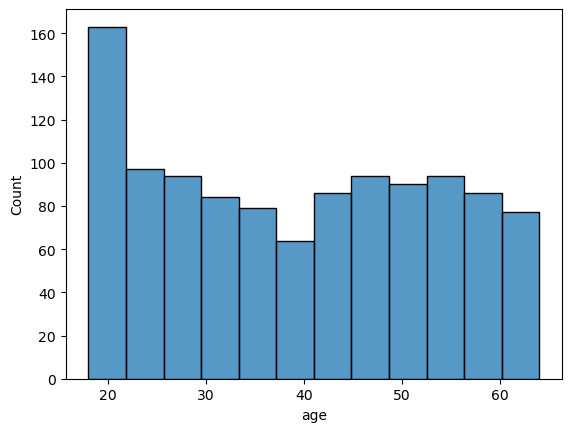

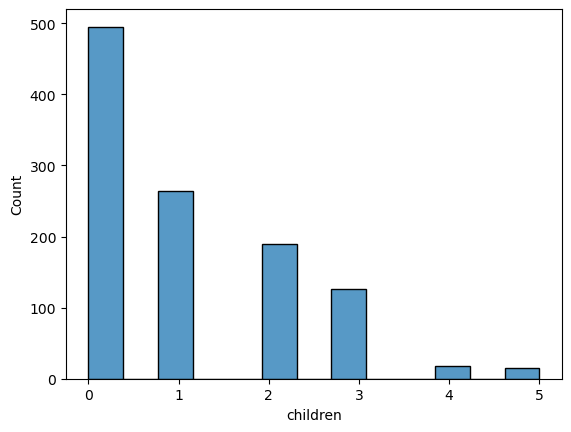

In [24]:
sns.histplot(x='age',data=insurance)
plt.show()

sns.histplot(x='children',data=insurance)
plt.show()

In [25]:
insurance.describe()

,age,bmi,children,charges
count,1108.000000,1108.000000,1108.000000,1108.000000
mean,39.211191,30.574085,1.055054,13292.707031
std,14.184313,6.126394,1.197574,12160.207031
min,18.000000,15.960000,0.000000,1121.873901
25%,26.000000,26.219999,0.000000,4719.193848
50%,39.000000,30.209999,1.000000,9447.316406
75%,51.250000,34.681250,2.000000,16604.302734
max,64.000000,53.130001,5.000000,63770.429688


In [26]:
#sns.pairplot(data=insurance)
#plt.show()

# EDA

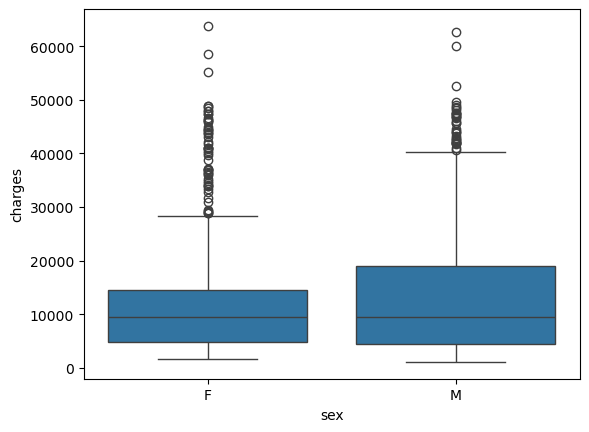

In [27]:
sns.boxplot(x='sex',y='charges',data=insurance)
plt.show()

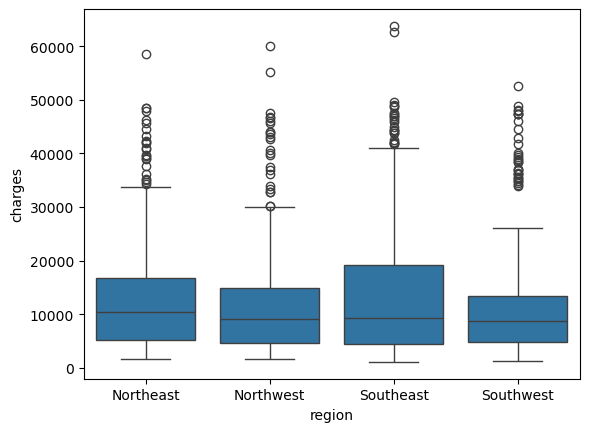

In [28]:
sns.boxplot(x='region',y='charges',data=insurance)
plt.show()

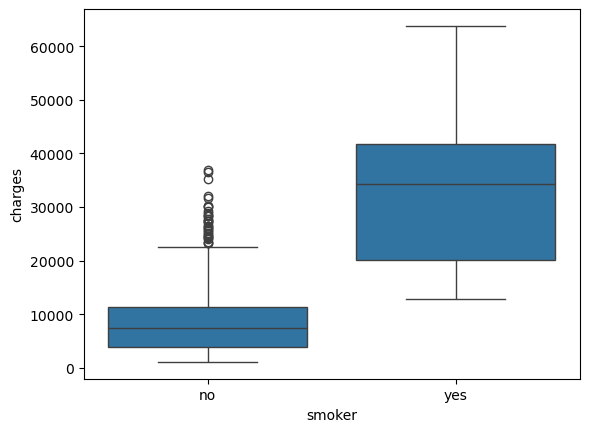

In [29]:
sns.boxplot(x='smoker',y='charges',data=insurance)
plt.show()

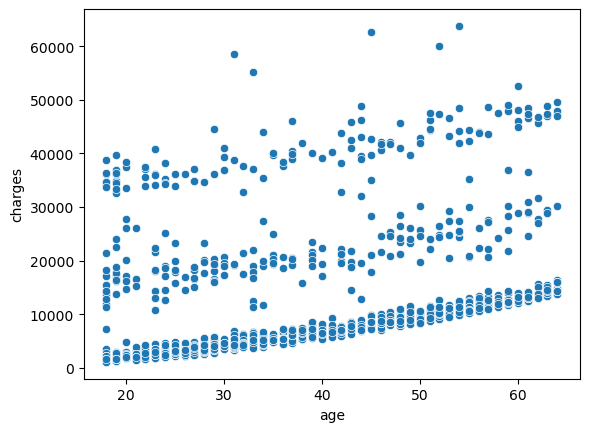

In [30]:
sns.scatterplot(x='age',y='charges',data=insurance)
plt.show()

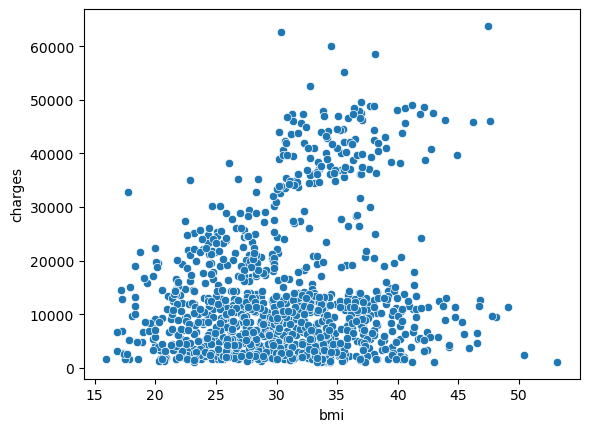

In [31]:
sns.scatterplot(x='bmi',y='charges',data=insurance)
plt.show()

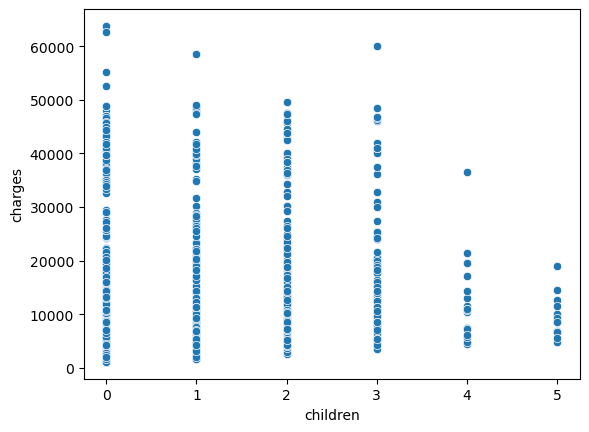

In [32]:
sns.scatterplot(x='children',y='charges',data = insurance)
plt.show()

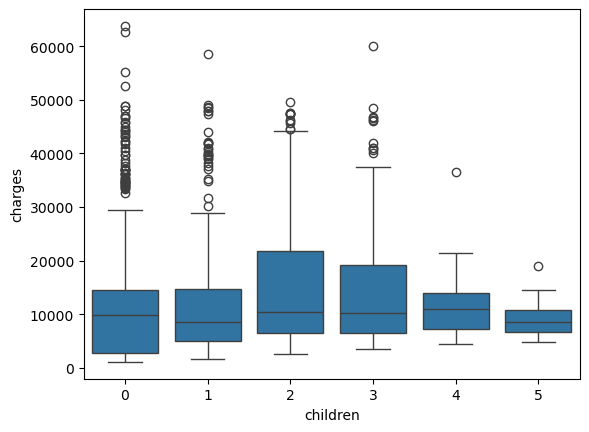

In [33]:
sns.boxplot(x='children',y='charges',data = insurance)
plt.show()

In [34]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1108 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1108 non-null   int16   
 1   sex       1108 non-null   category
 2   bmi       1108 non-null   float32 
 3   children  1108 non-null   int16   
 4   smoker    1108 non-null   category
 5   region    1108 non-null   category
 6   charges   1108 non-null   float32 
dtypes: category(3), float32(2), int16(2)
memory usage: 25.3 KB


In [35]:
insurance['children']=insurance['children'].astype('category')
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1108 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1108 non-null   int16   
 1   sex       1108 non-null   category
 2   bmi       1108 non-null   float32 
 3   children  1108 non-null   category
 4   smoker    1108 non-null   category
 5   region    1108 non-null   category
 6   charges   1108 non-null   float32 
dtypes: category(4), float32(2), int16(1)
memory usage: 24.4 KB


In [36]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,F,27.900000,0,yes,Southwest,16884.923828
1,18,M,33.770000,1,no,Southeast,1725.552246
2,28,M,33.000000,3,no,Southeast,4449.461914
3,33,M,22.705000,0,no,Northwest,21984.470703
4,32,M,28.879999,0,no,Northwest,3866.855225
...,...,...,...,...,...,...,...
1332,52,F,44.700001,3,no,Southwest,11411.684570
1333,50,M,30.969999,3,no,Northwest,10600.547852
1335,18,F,36.849998,0,no,Southeast,1629.833496
1336,21,F,25.799999,0,no,Southwest,2007.944946


# Choosing Features and Target

In [37]:
categorical_features = ['smoker']
numerical_features = ['age', 'bmi']
features = ['age','bmi','smoker_yes']
target = 'charges'

In [38]:
insurance_encoded = pd.get_dummies(insurance,columns= categorical_features,drop_first=True,dtype=int)
insurance_encoded

,age,sex,bmi,children,region,charges,smoker_yes
0,19,F,27.900000,0,Southwest,16884.923828,1
1,18,M,33.770000,1,Southeast,1725.552246,0
2,28,M,33.000000,3,Southeast,4449.461914,0
3,33,M,22.705000,0,Northwest,21984.470703,0
4,32,M,28.879999,0,Northwest,3866.855225,0
...,...,...,...,...,...,...,...
1332,52,F,44.700001,3,Southwest,11411.684570,0
1333,50,M,30.969999,3,Northwest,10600.547852,0
1335,18,F,36.849998,0,Southeast,1629.833496,0
1336,21,F,25.799999,0,Southwest,2007.944946,0


In [39]:
X = insurance_encoded[features]
y = insurance_encoded[target]

In [40]:
X.shape
X

,age,bmi,smoker_yes
0,19,27.900000,1
1,18,33.770000,0
2,28,33.000000,0
3,33,22.705000,0
4,32,28.879999,0
...,...,...,...
1332,52,44.700001,0
1333,50,30.969999,0
1335,18,36.849998,0
1336,21,25.799999,0


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [42]:
#Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
# creating metric Dataframe
metric_df =pd.DataFrame(columns=['name','mae','mse','r_squared(Testing)','r_squared(Training)','best_hyperparameter'])
metric_df


,name,mae,mse,r_squared(Testing),r_squared(Training),best_hyperparameter


# Linear Regression

In [44]:
# creating model
model1 = LinearRegression()

#fitting the model
model1.fit(X_train,y_train)
r2_train = model1.score(X_train,y_train)
#predicting the model
y_pred = model1.predict(X_test)

#calculating metrics
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(r2,mse,mae)

metric_df.loc[0] = ['linear', mae, mse, r2,r2_train,'']
metric_df



0.7539467399575954 32971583.610996448 4114.5508380359015


,name,mae,mse,r_squared(Testing),r_squared(Training),best_hyperparameter
0,linear,4114.550838,3.297158e+07,0.753947,0.745515,


In [45]:
steps = [('scaler',StandardScaler()),('lin_reg',LinearRegression())]

pipeline = Pipeline(steps)
pram = {}
kf = KFold(n_splits=5,shuffle=True,random_state=42)
model1_scaled = GridSearchCV(pipeline,param_grid=pram,cv=kf)

model1_scaled.fit(X_train,y_train)

model1_best_model = model1_scaled.best_estimator_
model1_best_param = model1_scaled.best_params_
model1_best_score = model1_scaled.best_score_

print(model1_best_param,model1_best_score)


y_pred = model1_best_model.predict(X_test)

r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)

print(r2,mse,mae)
metric_df.loc[1] = ['linear with scaling', mae, mse, r2,model1_best_score, '']
metric_df

{} 0.7390026402647661
0.7539467399575953 32971583.61099645 4114.5508380359015


,name,mae,mse,r_squared(Testing),r_squared(Training),best_hyperparameter
0,linear,4114.550838,3.297158e+07,0.753947,0.745515,
1,linear with scaling,4114.550838,3.297158e+07,0.753947,0.739003,


# Ridge

[0.7539464471815638, 0.7482942538537715, 0.7386200190745735, 0.7264846932887381, 0.7129099092357609, 0.6985713235677061, 0.6839183226647549, 0.6692499117248412, 0.6547638245116323, 0.640588876823126, 0.6268066148356661, 0.6134659967589714, 0.6005934655929239, 0.5881999278585499, 0.5762856280158617, 0.5648435750240541, 0.553861962454456, 0.5433258826687406, 0.5332185419616923, 0.5235221205710777, 0.5142183785640573, 0.5052890790888356, 0.496716279961416, 0.48848253016568177, 0.4805709976668572, 0.47296554768535926, 0.46565078537367677, 0.45861207308113694, 0.4518355296628529, 0.44530801729798564, 0.4390171198230145, 0.43295111551200893, 0.4270989464435182, 0.42145018600752404, 0.41599500567154646, 0.4107241418028752, 0.4056288631050201, 0.40070093904953574, 0.39593260955363774, 0.391316556057816, 0.38684587408726645, 0.3825140473299282, 0.3783149232273666, 0.37424269004901856, 0.3702918554026918, 0.36645722612260023, 0.3627338894690585, 0.35911719557009425, 0.35560274103374157, 0.352186

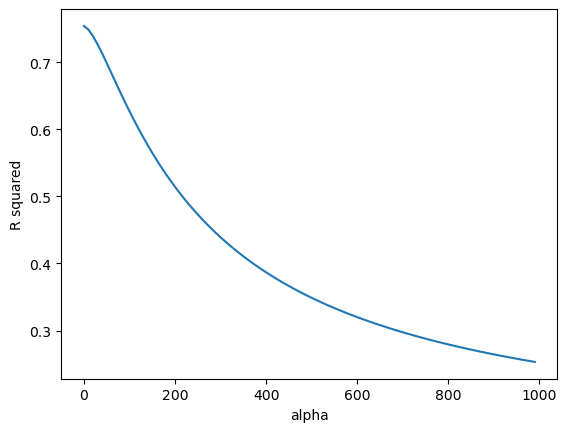

In [46]:
scores = []
for alpha in np.arange(0.001,1000,10):
    model2 = Ridge(alpha=alpha)
    model2.fit(X_train,y_train)
    scores.append(model2.score(X_test,y_test))

print(scores)

plt.plot(np.arange(0.001,1000,10),scores)
plt.xlabel('alpha')
plt.ylabel('R squared')
plt.show()

In [47]:
#creating pipeline
steps = [('scaler',StandardScaler()),('ridge',Ridge())]
pipeline = Pipeline(steps)

#finding best parameter
params = {'ridge__alpha':np.arange(0.001,1000,10)}
kf = KFold(n_splits=5,shuffle=True,random_state=42)
ridge = GridSearchCV(pipeline,param_grid=params,cv=kf)

#fitting the model
ridge.fit(X_train,y_train)

ridge_best_model = ridge.best_estimator_
ridge_best_para = ridge.best_params_
ridge_best_score = ridge.best_score_

print(ridge_best_para, ridge_best_score)

y_pred = ridge_best_model.predict(X_test)

r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)

metric_df.loc[2] = ['ridge', mae, mse, r2,ridge_best_score, ridge_best_para]
print(r2,mse,mae)



{'ridge__alpha': 10.001} 0.7392072891345098
0.7535861859788857 33019898.498810787 4122.600296761099


In [48]:
metric_df

,name,mae,mse,r_squared(Testing),r_squared(Training),best_hyperparameter
0,linear,4114.550838,3.297158e+07,0.753947,0.745515,
1,linear with scaling,4114.550838,3.297158e+07,0.753947,0.739003,
2,ridge,4122.600297,3.301990e+07,0.753586,0.739207,{'ridge__alpha': 10.001}


[0.7539467313837929, 0.7538577626558072, 0.7537616377285059, 0.753658168158635, 0.7535473539461941, 0.7534291950911836, 0.7533036915936032, 0.753170843453453, 0.753030650670733, 0.7528831132454432, 0.7527282311775837, 0.7525660044671543, 0.7523964331141552, 0.7522195171185863, 0.7520352564804474, 0.7518436511997388, 0.7516447012764607, 0.7514384067106125, 0.7512247675021946, 0.7510037836512069, 0.7507754551576492, 0.7505397820215219, 0.7502967642428249, 0.750046401821558, 0.7497886947577213, 0.7495236430513148, 0.7492512467023384, 0.7489715057107924, 0.7486844200766765, 0.7483899897999908, 0.7480882148807354, 0.7477790953189101, 0.747462631114515, 0.7471388222675501, 0.7468076687780156, 0.7464691706459111, 0.7461233278712369, 0.7457701404539929, 0.745409608394179, 0.7450417316917954, 0.744666510346842, 0.7442839443593188, 0.7438940337292257, 0.7434967784565629, 0.7430921785413303, 0.7426802339835279, 0.7422609447831557, 0.7418343109402138, 0.7414003324547019, 0.7409590093266204, 0.7405

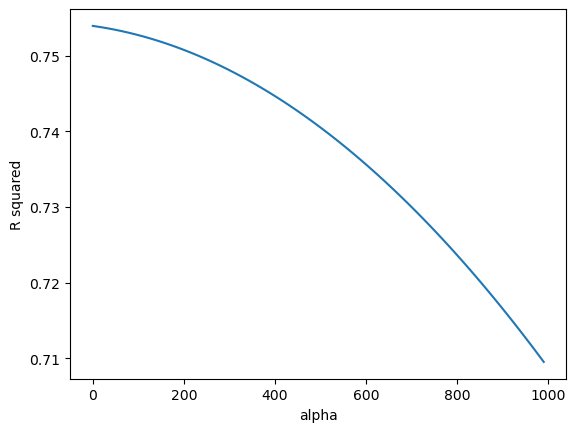

In [49]:
# Lasso 
scores = []
for alpha in np.arange(0.001,1000,10):
    model3 = Lasso(alpha=alpha)
    model3.fit(X_train,y_train)
    scores.append(model3.score(X_test,y_test))

print(scores)

plt.plot(np.arange(0.001,1000,10),scores)
plt.xlabel('alpha')
plt.ylabel('R squared')
plt.show()

In [50]:
#creating pipeline
steps = [('scaler',StandardScaler()),('lasso',Lasso())]
pipeline = Pipeline(steps)

params = {'lasso__alpha':np.arange(0.001,1000,10)}
kf = KFold(n_splits=5,shuffle=True,random_state=42)
lasso = GridSearchCV(pipeline,param_grid=params,cv=kf)

lasso.fit(X_train,y_train)

lasso_best_model = lasso.best_estimator_
lasso_best_para = lasso.best_params_
lasso_best_score = lasso.best_score_

print(lasso_best_para, lasso_best_score)

y_pred = lasso_best_model.predict(X_test)

r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)


print(r2,mse,mae)
metric_df.loc[3] = ['lasso', mae, mse, r2,lasso_best_score, lasso_best_para]

{'lasso__alpha': 60.001} 0.7390692225644386
0.7541094905845496 32949774.73147404 4098.650790706955


In [51]:
metric_df

,name,mae,mse,r_squared(Testing),r_squared(Training),best_hyperparameter
0,linear,4114.550838,3.297158e+07,0.753947,0.745515,
1,linear with scaling,4114.550838,3.297158e+07,0.753947,0.739003,
2,ridge,4122.600297,3.301990e+07,0.753586,0.739207,{'ridge__alpha': 10.001}
3,lasso,4098.650791,3.294977e+07,0.754109,0.739069,{'lasso__alpha': 60.001}


# poly regression

In [52]:
X

,age,bmi,smoker_yes
0,19,27.900000,1
1,18,33.770000,0
2,28,33.000000,0
3,33,22.705000,0
4,32,28.879999,0
...,...,...,...
1332,52,44.700001,0
1333,50,30.969999,0
1335,18,36.849998,0
1336,21,25.799999,0


In [53]:
pipe = Pipeline([('scaler',StandardScaler()),('poly',PolynomialFeatures()),('reg',LinearRegression())])

prams = {'poly__degree':list(range(2,11))}

kf = KFold(n_splits=5,shuffle=True,random_state=42)

poly = GridSearchCV(pipe, param_grid=prams, cv=kf)

poly.fit(X_train,y_train)

best_model = poly.best_estimator_
best_degree = poly.best_params_['poly__degree']
best_score = poly.best_score_

print(best_degree, best_score)


y_pred = best_model.predict(X_test)

r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)

print(r2,mse,mae)
metric_df.loc[4] = ['poly', mae, mse, r2, best_score, 'degree :'+str(best_degree)]

2 0.8405983999819766
0.8181727984669742 24365175.153812084 2916.33551117035


In [54]:
metric_df

,name,mae,mse,r_squared(Testing),r_squared(Training),best_hyperparameter
0,linear,4114.550838,3.297158e+07,0.753947,0.745515,
1,linear with scaling,4114.550838,3.297158e+07,0.753947,0.739003,
2,ridge,4122.600297,3.301990e+07,0.753586,0.739207,{'ridge__alpha': 10.001}
3,lasso,4098.650791,3.294977e+07,0.754109,0.739069,{'lasso__alpha': 60.001}
4,poly,2916.335511,2.436518e+07,0.818173,0.840598,degree :2


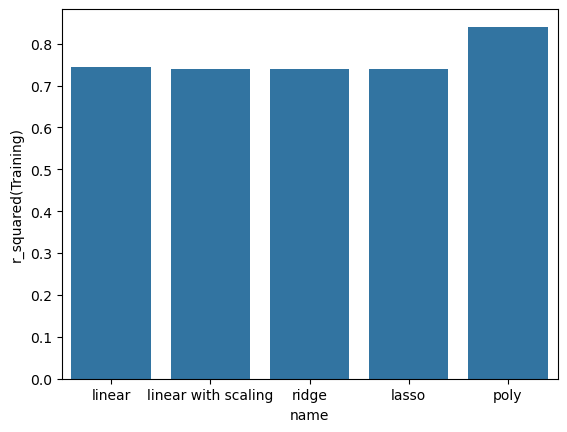

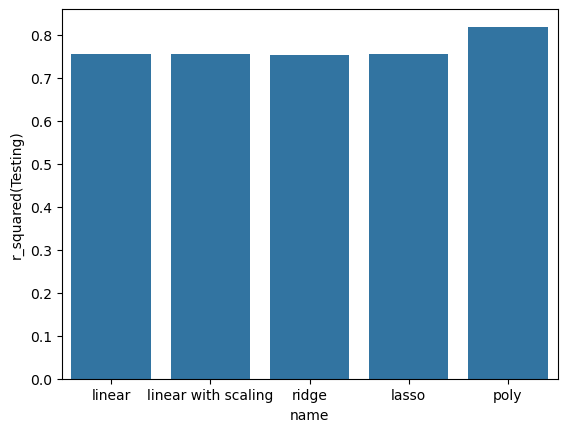

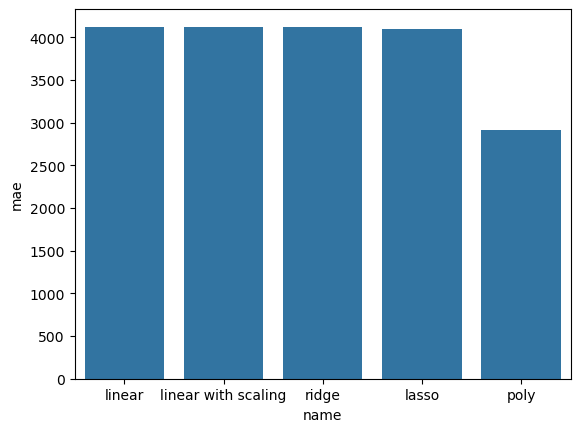

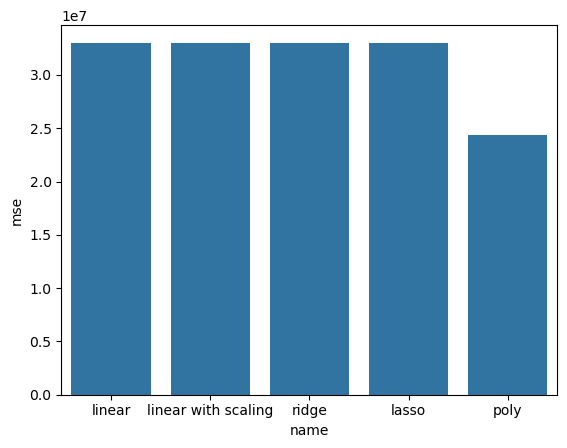

In [55]:
sns.barplot(x='name',y='r_squared(Training)',data = metric_df)
plt.show()
sns.barplot(x='name',y='r_squared(Testing)',data = metric_df)
plt.show()

sns.barplot(x='name',y='mae',data=metric_df)
plt.show()

sns.barplot(x='name',y='mse',data=metric_df)
plt.show()

In [56]:
def predict_charges(age, bmi, smoker):
    # Convert smoker input to binary
    smoker_yes = 1 if smoker.lower() == 'yes' else 0

    # Create input DataFrame
    input_data = pd.DataFrame([[age, bmi, smoker_yes]], columns=['age', 'bmi', 'smoker_yes'])

    # Predict
    predicted_charge = best_model.predict(input_data)[0]
    return predicted_charge

In [57]:
charge = predict_charges(age=30, bmi=27.5, smoker='no')
print(f"Predicted insurance charges: ${charge:.2f}")

Predicted insurance charges: $5727.50


In [58]:
insurance.iloc[1000]

age                  35
sex                   M
bmi           17.860001
children              1
smoker               no
region        Northwest
charges     5116.500488
Name: 1205, dtype: object

In [59]:
charge = predict_charges(age=35, bmi=18, smoker='no')
print(f"Predicted insurance charges: ${charge:.2f}")

Predicted insurance charges: $6348.50


In [60]:
insurance.iloc[0]

age                   19
sex                    F
bmi                 27.9
children               0
smoker               yes
region         Southwest
charges     16884.923828
Name: 0, dtype: object

In [61]:
charge = predict_charges(age=19, bmi=28, smoker='yes')
print(f"Predicted insurance charges: ${charge:.2f}")

Predicted insurance charges: $23451.50


In [63]:
insurance['charges'].mean()

13292.707